<a href="https://colab.research.google.com/github/ND15/Image-Processing/blob/main/EdgeDetectorsAlongwithDCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

In [ ]:
def convolution(image, kernel):
    output = np.zeros(image.shape)

    image_row, image_col = (image.shape[0], image.shape[1])
    kernel_row, kernel_col = kernel.shape

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
    
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
    return output


def gaussian_kernel(size, sigma):
    xa = np.linspace(-(size // 2), size // 2, size)
    xb = np.linspace(-(size // 2), size // 2, size)

    x, y = np.meshgrid(xa, xb, sparse=True)
    kernel = (1 / (np.sqrt(2 * np.pi * sigma))) * np.exp(-(x*x + y*y) / (2. * sigma * sigma))
    
    print(kernel)
    return kernel


def rgb_to_gray(image):
    return np.reshape(
            np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]), 
            (image.shape[0], image.shape[1])
        )


def convert_image(image):
    if image.shape[2] > 2:
        image = rgb_to_gray(image)
    return image


def sobel(image):
    image = convert_image(image)
    image = convolution(image, gaussian_kernel(9, 1))

    vertical_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    vertical_conv = convolution(image, vertical_filter)
    horizontal_conv = convolution(image, vertical_filter.T)

    output = np.sqrt(np.square(vertical_conv) + np.square(horizontal_conv))

    return output

def prewitt(image):
    image = convert_image(image)
    image = convolution(image, gaussian_kernel(9, 1))

    vertical_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    vertical_conv = convolution(image, vertical_filter)
    horizontal_conv = convolution(image, vertical_filter.T)

    output = np.sqrt(np.square(vertical_conv) + np.square(horizontal_conv))

    return output

[[0.00730688 0.03274718 0.05399097 0.03274718 0.00730688]
 [0.03274718 0.14676266 0.24197072 0.14676266 0.03274718]
 [0.05399097 0.24197072 0.39894228 0.24197072 0.05399097]
 [0.03274718 0.14676266 0.24197072 0.14676266 0.03274718]
 [0.00730688 0.03274718 0.05399097 0.03274718 0.00730688]]


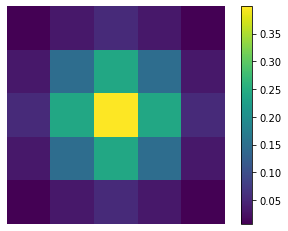

In [ ]:
plt.imshow(gaussian_kernel(5, 1))
plt.colorbar()
plt.axis('off')
plt.show()

In [ ]:
img = load_img("Test.gif")
image_array = img_to_array(img)
image_array.shape

(512, 512, 3)

In [ ]:
gray_img = convert_image(image_array)
gauss_filter = gaussian_kernel(5, 5)
result = convolution(gray_img, gauss_filter)
result.shape

[[0.15203303 0.16143423 0.16469541 0.16143423 0.15203303]
 [0.16143423 0.17141676 0.17487961 0.17141676 0.16143423]
 [0.16469541 0.17487961 0.17841241 0.17487961 0.16469541]
 [0.16143423 0.17141676 0.17487961 0.17141676 0.16143423]
 [0.15203303 0.16143423 0.16469541 0.16143423 0.15203303]]


(512, 512)

(-0.5, 511.5, 511.5, -0.5)

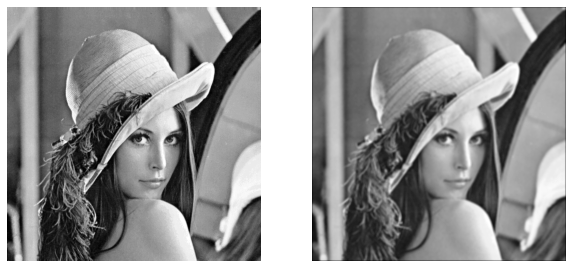

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(gray_img, cmap='gray')
ax[0].axis('off')

ax[1].imshow(result, cmap='gray')
ax[1].axis('off')

In [ ]:
from keras_preprocessing import image
main_output = sobel(image_array)

[[4.48950392e-08 1.48671951e-06 1.81119515e-05 8.11721351e-05
  1.33830226e-04 8.11721351e-05 1.81119515e-05 1.48671951e-06
  4.48950392e-08]
 [1.48671951e-06 4.92333887e-05 5.99785460e-04 2.68805194e-03
  4.43184841e-03 2.68805194e-03 5.99785460e-04 4.92333887e-05
  1.48671951e-06]
 [1.81119515e-05 5.99785460e-04 7.30688275e-03 3.27471765e-02
  5.39909665e-02 3.27471765e-02 7.30688275e-03 5.99785460e-04
  1.81119515e-05]
 [8.11721351e-05 2.68805194e-03 3.27471765e-02 1.46762663e-01
  2.41970725e-01 1.46762663e-01 3.27471765e-02 2.68805194e-03
  8.11721351e-05]
 [1.33830226e-04 4.43184841e-03 5.39909665e-02 2.41970725e-01
  3.98942280e-01 2.41970725e-01 5.39909665e-02 4.43184841e-03
  1.33830226e-04]
 [8.11721351e-05 2.68805194e-03 3.27471765e-02 1.46762663e-01
  2.41970725e-01 1.46762663e-01 3.27471765e-02 2.68805194e-03
  8.11721351e-05]
 [1.81119515e-05 5.99785460e-04 7.30688275e-03 3.27471765e-02
  5.39909665e-02 3.27471765e-02 7.30688275e-03 5.99785460e-04
  1.81119515e-05]
 [1.48

(-0.5, 511.5, 511.5, -0.5)

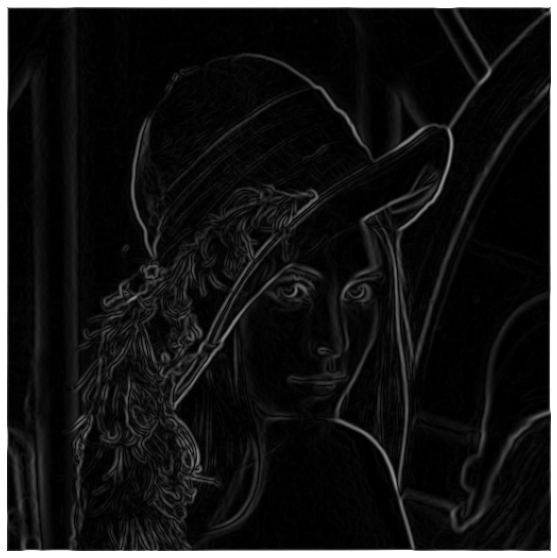

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(main_output, cmap="gray")
plt.axis('off')

[[4.48950392e-08 1.48671951e-06 1.81119515e-05 8.11721351e-05
  1.33830226e-04 8.11721351e-05 1.81119515e-05 1.48671951e-06
  4.48950392e-08]
 [1.48671951e-06 4.92333887e-05 5.99785460e-04 2.68805194e-03
  4.43184841e-03 2.68805194e-03 5.99785460e-04 4.92333887e-05
  1.48671951e-06]
 [1.81119515e-05 5.99785460e-04 7.30688275e-03 3.27471765e-02
  5.39909665e-02 3.27471765e-02 7.30688275e-03 5.99785460e-04
  1.81119515e-05]
 [8.11721351e-05 2.68805194e-03 3.27471765e-02 1.46762663e-01
  2.41970725e-01 1.46762663e-01 3.27471765e-02 2.68805194e-03
  8.11721351e-05]
 [1.33830226e-04 4.43184841e-03 5.39909665e-02 2.41970725e-01
  3.98942280e-01 2.41970725e-01 5.39909665e-02 4.43184841e-03
  1.33830226e-04]
 [8.11721351e-05 2.68805194e-03 3.27471765e-02 1.46762663e-01
  2.41970725e-01 1.46762663e-01 3.27471765e-02 2.68805194e-03
  8.11721351e-05]
 [1.81119515e-05 5.99785460e-04 7.30688275e-03 3.27471765e-02
  5.39909665e-02 3.27471765e-02 7.30688275e-03 5.99785460e-04
  1.81119515e-05]
 [1.48

(-0.5, 511.5, 511.5, -0.5)

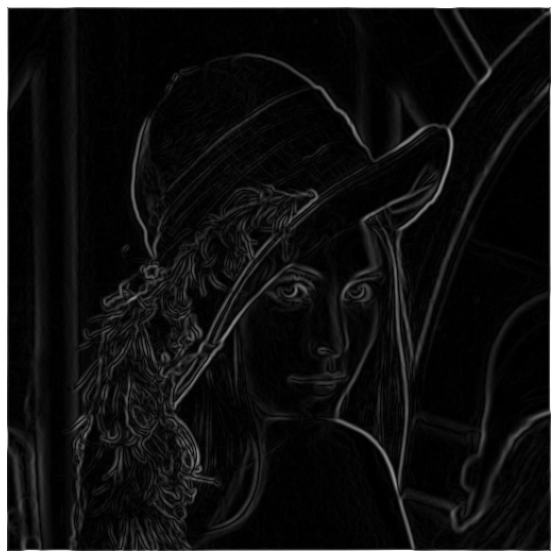

In [ ]:
main_output = prewitt(image_array)
plt.figure(figsize=(10, 10))
plt.imshow(main_output, cmap="gray")
plt.axis('off')

[[0.00730688 0.03274718 0.05399097 0.03274718 0.00730688]
 [0.03274718 0.14676266 0.24197072 0.14676266 0.03274718]
 [0.05399097 0.24197072 0.39894228 0.24197072 0.05399097]
 [0.03274718 0.14676266 0.24197072 0.14676266 0.03274718]
 [0.00730688 0.03274718 0.05399097 0.03274718 0.00730688]]


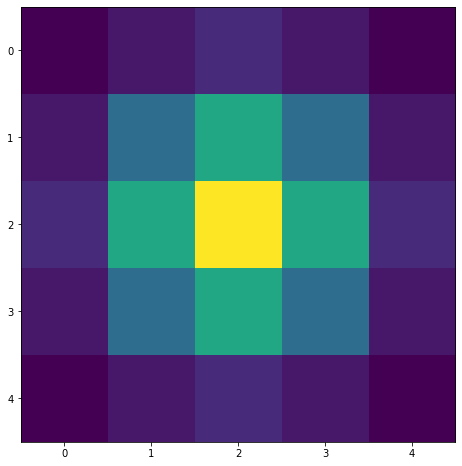

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(gaussian_kernel(5, 1))

In [ ]:
def cosine_transform_kernel(point):
    output = np.zeros((point, point))
    for k in range(point):
        for n in range(point):
            if k == 0:
                output[k, n] = np.sqrt(1 / point) * np.cos( (90 * (2 * n + 1) * k) / 2 * point )
            else:
                output[k, n] = (np.sqrt(2 / point)) * np.cos( (90 * (2 * n + 1) * k) / 2 * point )
    return output

In [ ]:
def dct(point):
    output = np.zeros((point, point))
    for u in range(point):
        for v in range(point):
            if u == 0:
                output[u, v] = np.sqrt(1 / point)
            else:
                output[u, v] = np.sqrt(2 / point) * math.cos( ( ( (2 * v + 1) * u) * math.pi) / (2 * point) )
    return output

In [ ]:
dct(512)

array([[ 0.04419417,  0.04419417,  0.04419417, ...,  0.04419417,
         0.04419417,  0.04419417],
       [ 0.06249971,  0.06249735,  0.06249265, ..., -0.06249265,
        -0.06249735, -0.06249971],
       [ 0.06249882,  0.06248941,  0.06247059, ...,  0.06247059,
         0.06248941,  0.06249882],
       ...,
       [ 0.00057523, -0.00172551,  0.0028752 , ..., -0.0028752 ,
         0.00172551, -0.00057523],
       [ 0.00038349, -0.00115042,  0.00191718, ...,  0.00191718,
        -0.00115042,  0.00038349],
       [ 0.00019175, -0.00057523,  0.0009587 , ..., -0.0009587 ,
         0.00057523, -0.00019175]])

In [ ]:
def recenter(shape=(4, 4)):
    row, col = shape
    center_matrix = np.zeros((row, col))

    for i in range(0, row):
        for j in range(0, col):
            center_matrix[i, j] = math.pow(-1, i + j)

    return center_matrix

In [ ]:
def step1(image, recenter):
    return np.multiply(image, recenter)

In [ ]:
def step2(image, kernel):
    output = np.matmul(kernel, image)
    output = np.matmul(output, kernel.T)
    return output

In [ ]:
from sklearn.preprocessing import minmax_scale
shape = gray_img.shape
image_scaled = minmax_scale(gray_img.ravel(), feature_range=(-128,127)).reshape(shape)
image_scaled.shape

(512, 512)

In [ ]:
image_scaled

array([[  47.47670525,   47.47670525,   53.45348782, ...,   58.52938002,
          33.9773002 ,    1.46422541],
       [  47.47670525,   47.47670525,   53.45348782, ...,   58.52938002,
          33.9773002 ,    1.46422541],
       [  47.47670525,   47.47670525,   53.45348782, ...,   58.52938002,
          33.9773002 ,    1.46422541],
       ...,
       [-111.52427635, -111.52427635, -105.37780552, ...,  -33.9733896 ,
         -33.59296597,  -41.49601207],
       [-111.52427635, -111.52427635,  -98.78934037, ...,  -28.22786596,
         -28.22786596,  -26.62407719],
       [-111.52427635, -111.52427635,  -98.78934037, ...,  -28.22786596,
         -28.22786596,  -26.62407719]])

In [ ]:
recenter_mat = recenter((512, 512))
r_image = step1(image_scaled, recenter_mat)

In [ ]:
dct_point = 8

out = np.zeros(r_image.shape)
for i in range(0, 512, dct_point):
    for j in range(0, 512, dct_point):
        out[i : i + dct_point, j : j + dct_point] = step2(r_image[i : i + dct_point, j : j + dct_point], dct(dct_point))

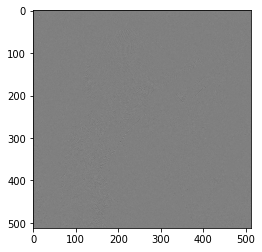

In [ ]:
plt.imshow(r_image, cmap="gray")

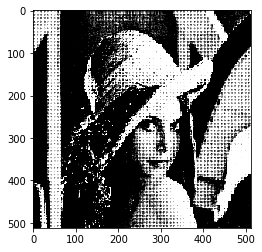

In [ ]:
plt.imshow(out,cmap='gray',vmax = np.max(out)*0.01,vmin = 0)

In [ ]:
def calc_distance(image):
    row, col = image.shape
    result = np.zeros((row, col))

    for i in range(0, row):
        for j in range(0, col):
            result[i, j] = np.sqrt(math.pow((i - (row / 2)), 2) + math.pow((j - (col / 2)), 2))

    return result

In [ ]:
calc_distance(out)

array([[362.03867197, 361.33225707, 360.62723136, ..., 359.923603  ,
        360.62723136, 361.33225707],
       [361.33225707, 360.62445841, 359.91804623, ..., 359.21302872,
        359.91804623, 360.62445841],
       [360.62723136, 359.91804623, 359.21024484, ..., 358.5038354 ,
        359.21024484, 359.91804623],
       ...,
       [359.923603  , 359.21302872, 358.5038354 , ..., 357.79603128,
        358.5038354 , 359.21302872],
       [360.62723136, 359.91804623, 359.21024484, ..., 358.5038354 ,
        359.21024484, 359.91804623],
       [361.33225707, 360.62445841, 359.91804623, ..., 359.21302872,
        359.91804623, 360.62445841]])

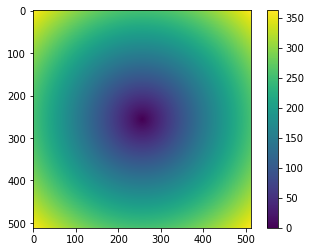

In [ ]:
plt.imshow(calc_distance(out))
plt.colorbar()

In [ ]:
np.average(out)

-1.0928940123352666

In [ ]:
def ilpf(image, cutoff=1):
    return np.where(image > cutoff, 1, 0)

In [ ]:
out.max() / 512

1.609849967106055

In [ ]:
pq = calc_distance(out)
np.any(pq < 0)

False

In [ ]:
pp = ilpf(pq, 1.09)
np.any(pp < 0)

False

In [ ]:
def step3(f_u_v, h_u_v):
    return np.multiply(f_u_v, h_u_v)

In [ ]:
result_image = step3(out, pp)

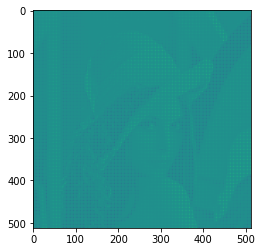

In [ ]:
plt.imshow(result_image)

In [ ]:
def step3(image, kernel):
    output = np.matmul(kernel.T, image)
    output = np.matmul(output, kernel)
    return output

rs = np.zeros(result_image.shape)
for i in range(0, 512, dct_point):
    for j in range(0, 512, dct_point):
        rs[i : i + dct_point, j : j + dct_point] = step3(out[i : i + dct_point, j : j + dct_point], dct(dct_point))

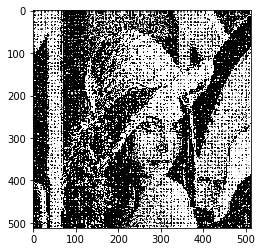

In [ ]:
plt.imshow(rs, cmap="gray", vmax = np.max(out)*0.01,vmin = 0)

In [ ]:
img = load_img("res.png")
image_array = img_to_array(img)
image_array.shape

(252, 262, 3)

In [ ]:
gray_img = convert_image(image_array)

In [ ]:
shape = gray_img.shape
image_scaled = minmax_scale(gray_img.ravel(), feature_range=(-128,127)).reshape(shape)
image_scaled.shape

(252, 262)

In [ ]:
dct_point = 4

res = np.zeros(gray_img.shape)
for i in range(0, 252, dct_point):
    for j in range(0, 262, dct_point):
        res[i : i + dct_point, j : j + dct_point] = step2(image_scaled[i : i + dct_point, j : j + dct_point], dct(dct_point))

ValueError: ignored